In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from process import load_trace, METRICS_CONFIGS
sns.set_theme()

In [2]:
anomaly = "LFBT_LFBL"
metrics_config = 0
ANOMALY_NAME = "STSB"

In [3]:
normal_df, _ = load_trace(anomaly, "xFTx.xx", metrics_config)
normal_df = normal_df.reset_index(drop=True)
stress_df, _ = load_trace(anomaly, "SFTS.xx", metrics_config)

In [4]:
measure_columns = ["DURATION"] + METRICS_CONFIGS[metrics_config]
stress_df.head(10600)[measure_columns]

,DURATION,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB
0,44999.538462,1.787177e+06,518.038462,1139.461538,4041.384615,1597.807692,1667.307692
1,44814.384615,1.788079e+06,402.692308,1000.423077,3197.807692,1420.807692,1463.230769
2,44929.423077,1.792096e+06,393.269231,986.923077,3124.192308,1445.269231,1481.576923
3,45115.615385,1.796449e+06,394.461538,981.307692,3088.115385,1432.538462,1467.307692
4,45347.115385,1.803928e+06,483.500000,1083.038462,3679.076923,1552.961538,1615.038462
...,...,...,...,...,...,...,...
3885,51120.076923,2.038970e+06,398.576923,995.615385,3220.307692,1505.615385,1540.115385
3886,50438.730769,2.013199e+06,386.076923,978.923077,3191.730769,1492.461538,1528.615385
3887,49877.653846,1.989417e+06,417.076923,1018.423077,3228.000000,1492.038462,1535.346154
3888,49347.461538,1.967700e+06,421.076923,1011.307692,3262.384615,1515.153846,1552.923077


In [5]:
normal_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,47919123718,43932.961538,SENS_C1,INTERVAL,PROBE,1,63,0x00000a79,1.784755e+06,424.153846,1042.269231,3481.384615,60.692308,63.500000,0,NOSTRESS
1,47920723278,43995.615385,SENS_C1,INTERVAL,PROBE,1,63,0x00000a79,1.787228e+06,377.846154,969.230769,3021.153846,22.076923,67.153846,0,NOSTRESS
2,47922323308,44108.807692,SENS_C1,INTERVAL,PROBE,1,63,0x00000a79,1.791509e+06,418.269231,1013.307692,3130.000000,68.423077,32.923077,0,NOSTRESS
3,47923923274,44220.653846,SENS_C1,INTERVAL,PROBE,1,63,0x00000a79,1.796396e+06,392.384615,996.807692,3143.076923,50.423077,16.038462,0,NOSTRESS
4,47925523263,44466.115385,SENS_C1,INTERVAL,PROBE,1,63,0x00000a79,1.803233e+06,501.923077,1118.923077,3788.884615,94.230769,30.153846,0,NOSTRESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,54513303905,50345.884615,SENS_C1,INTERVAL,PROBE,1,63,0x00000b0e,2.039352e+06,350.846154,1005.346154,3276.576923,86.730769,17.692308,0,NOSTRESS
3886,54514903879,49748.961538,SENS_C1,INTERVAL,PROBE,1,63,0x00000b0e,2.013608e+06,371.230769,1016.692308,3339.307692,111.153846,39.076923,0,NOSTRESS
3887,54516503860,49059.692308,SENS_C1,INTERVAL,PROBE,1,63,0x00000b0e,1.989864e+06,331.153846,982.769231,3217.769231,105.961538,21.500000,0,NOSTRESS
3888,54518103852,48505.730769,SENS_C1,INTERVAL,PROBE,1,63,0x00000b0e,1.967634e+06,343.500000,995.230769,3218.384615,70.730769,16.807692,0,NOSTRESS


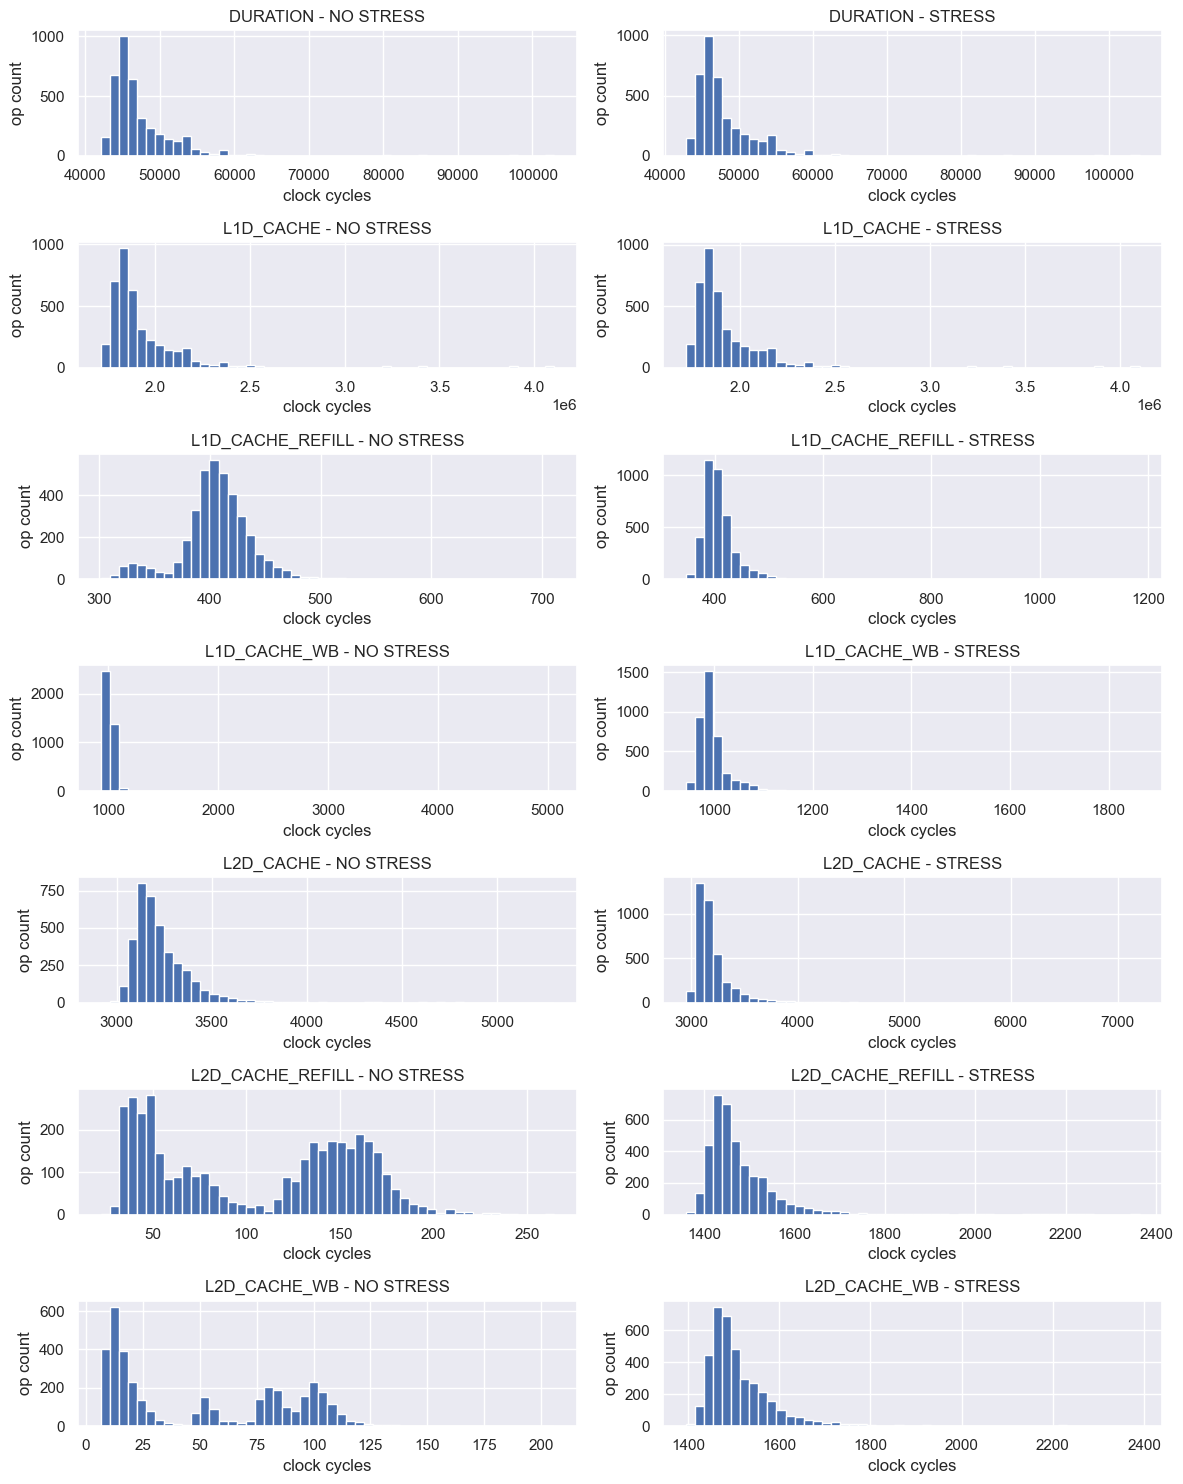

In [6]:
fig, axs = plt.subplots(7, 2, figsize=(12, 15))
for i, o in enumerate(['DURATION'] + METRICS_CONFIGS[metrics_config]):
    no_st_ax, st_ax = axs[i][0], axs[i][1]
    no_st_ax.set_title(f"{o} - NO STRESS")
    no_st_ax.set_xlabel("clock cycles")
    no_st_ax.set_ylabel("op count")
    st_ax.set_title(f"{o} - STRESS")
    st_ax.set_xlabel("clock cycles")
    st_ax.set_ylabel("op count")
    normal_df[o].hist(bins=50, ax=no_st_ax)
    stress_df[o].hist(bins=50, ax=st_ax)

plt.tight_layout()
plt.show()


In [7]:
predictors = ['L1D_CACHE_REFILL', 'L2D_CACHE_REFILL', 'L2D_CACHE_WB']

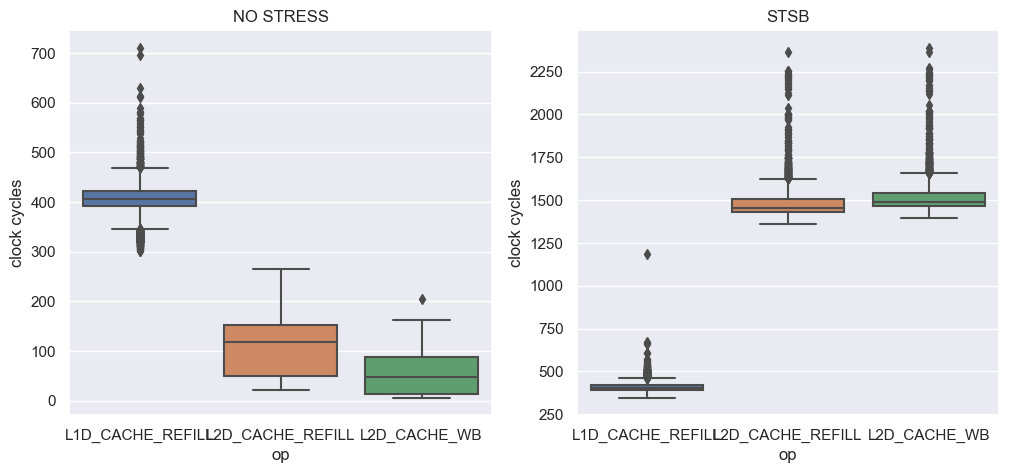

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="variable", y="value", data=normal_df[predictors].melt(), ax=axs[0])
axs[0].set_title("NO STRESS")
axs[0].set_xlabel("op")
axs[0].set_ylabel("clock cycles")
sns.boxplot(x="variable", y="value", data=stress_df[predictors].melt(), ax=axs[1])
axs[1].set_xlabel("op")
axs[1].set_ylabel("clock cycles")
axs[1].set_title(ANOMALY_NAME)
plt.show()


In [9]:
def drop_quantile(df, q=0.025):
    cols = predictors  # one or more

    Q1 = df[cols].quantile(q)
    Q3 = df[cols].quantile(1 - q)
    IQR = Q3 - Q1

    df = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df


In [10]:
normal_df = drop_quantile(normal_df)
stress_df = drop_quantile(stress_df)
merged = pd.concat([normal_df, stress_df])
model = KMeans(n_clusters=2)
model.fit(merged[predictors])


/Users/vdecaro/miniconda3/envs/avl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [11]:
labels = {"NOSTRESS": 0, ANOMALY_NAME: 1}


def test_fn(test_df, model):
    results = model.predict(test_df[predictors])
    y_true = test_df["CONTEXT"].to_numpy()
    y_true = [labels[y] for y in y_true]
    y_pred = results
    print(
        "Accuracy in regime prediction:",
        f"{round(accuracy_score(y_true, y_pred) * 100, 2)}%",
    )


In [12]:
test_fn(merged, model)

Accuracy in regime prediction: 100.0%


# Test ZTFZ.ZZ: intermittent anomaly

In [13]:
test_df, _ = load_trace(anomaly, "ZFTZ.ZZ", metrics_config)


In [14]:
test_df

,TIMESTAMP,DURATION,PROBE,KIND,LAYER,CORE,PAIR_ON,PID,L1D_CACHE,L1D_CACHE_REFILL,L1D_CACHE_WB,L2D_CACHE,L2D_CACHE_REFILL,L2D_CACHE_WB,LMC0,CONTEXT
0,967064187,45235.884615,SENS_C1,INTERVAL,PROBE,1,63,0x000004de,1.785695e+06,509.692308,1115.576923,3600.461538,1455.076923,1538.846154,0,STSB
1,968643281,45076.269231,SENS_C1,INTERVAL,PROBE,1,63,0x000004de,1.788325e+06,392.538462,984.500000,3085.846154,1317.884615,1378.807692,0,STSB
2,970243349,45211.192308,SENS_C1,INTERVAL,PROBE,1,63,0x000004de,1.792286e+06,406.307692,1003.692308,3105.384615,1349.576923,1412.269231,0,STSB
3,971843321,45275.615385,SENS_C1,INTERVAL,PROBE,1,63,0x000004de,1.796676e+06,380.307692,978.038462,3023.923077,1324.461538,1381.038462,0,STSB
4,973443304,45447.153846,SENS_C1,INTERVAL,PROBE,1,63,0x000004de,1.801201e+06,385.923077,986.384615,3035.615385,1326.576923,1385.461538,0,STSB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,7581354353,50307.576923,SENS_C1,INTERVAL,PROBE,1,63,0x00000664,2.039560e+06,454.346154,1065.038462,3430.000000,78.576923,27.423077,0,NOSTRESS
3886,7582954292,49638.423077,SENS_C1,INTERVAL,PROBE,1,63,0x00000664,2.013429e+06,438.000000,1041.730769,3341.961538,79.423077,34.653846,0,NOSTRESS
3887,7584554283,49103.076923,SENS_C1,INTERVAL,PROBE,1,63,0x00000664,1.990351e+06,481.000000,1087.961538,3558.038462,126.500000,40.923077,0,NOSTRESS
3888,7586154259,48482.384615,SENS_C1,INTERVAL,PROBE,1,63,0x00000664,1.967736e+06,428.192308,1044.615385,3332.423077,83.269231,25.307692,0,NOSTRESS


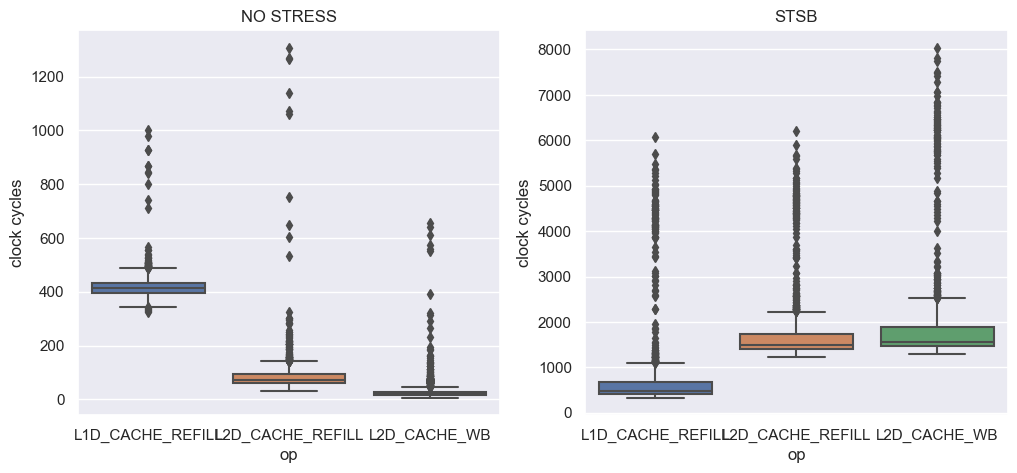

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
normal_df = test_df[test_df["CONTEXT"] == "NOSTRESS"]
stress_df = test_df[test_df["CONTEXT"] == ANOMALY_NAME]
sns.boxplot(x="variable", y="value", data=normal_df[predictors].melt(), ax=axs[0])
axs[0].set_title("NO STRESS")
axs[0].set_xlabel("op")
axs[0].set_ylabel("clock cycles")
sns.boxplot(x="variable", y="value", data=stress_df[predictors].melt(), ax=axs[1])
axs[1].set_xlabel("op")
axs[1].set_ylabel("clock cycles")
axs[1].set_title(ANOMALY_NAME)
plt.show()


In [16]:
test_fn(test_df, model)

Accuracy in regime prediction: 99.85%


In [17]:
import pickle

with open(f'models/{anomaly}.pkl', 'wb+') as f:
    pickle.dump({'headers': predictors, 'model': model}, f)